### Question 3: Iris classification using sklearn

In [1]:
# Import libs
import numpy as np 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load the iris dataset
iris_X, iris_y = datasets.load_iris(return_X_y=True)

print('iris_X\n', iris_X[:5])
print('iris_y\n', iris_y[:5])

iris_X
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
iris_y
 [0 0 0 0 0]


In [3]:
# Split train:test = 8:2
X_train, X_test, y_train, y_test = train_test_split(
    iris_X, iris_y,
    test_size=0.2,
    random_state=42
)

In [4]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train[:5]

array([[-1.47393679,  1.20365799, -1.56253475, -1.31260282],
       [-0.13307079,  2.99237573, -1.27600637, -1.04563275],
       [ 1.08589829,  0.08570939,  0.38585821,  0.28921757],
       [-1.23014297,  0.75647855, -1.2187007 , -1.31260282],
       [-1.7177306 ,  0.30929911, -1.39061772, -1.31260282]])

In [5]:
# Build KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [6]:
# Predict and Evaluate test set
y_pred = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.9666666666666667

In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### Question 5: KNN Regressor for Diabetes Dataset


In [8]:
# Load libs
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [9]:
# Load diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [10]:
# Split train:test = 8:2
X_train, X_test, y_train, y_test = train_test_split(
    diabetes_X, diabetes_y,
    test_size=0.2,
    random_state=42
)

In [11]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [12]:
# Build KNN model
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [13]:
# Inference
y_pred = knn_regressor.predict(X_test)
y_pred

array([125.6, 145.2, 186.4, 253.8, 153.4, 150.4, 246.2, 170. ,  88. ,
       123.2,  93.2, 151.6, 104. , 230. , 109.4, 132.6, 294.8, 281.4,
       221. , 215.4, 198.4,  82.2,  85. , 215.4, 118. , 158.2, 215.8,
       145.6,  93.6, 128.6, 158. , 166.6,  98.2, 180.2, 165.4, 243.6,
        85.8, 161. , 174.8, 109.8,  90. ,  99.4, 193.8, 136. , 218. ,
        81.6,  58.6,  90.8,  88.6, 119.2, 129.6,  88.6, 150.6, 102.6,
       202.2, 168.8,  94.4, 216.2, 145.6,  73. , 155. , 151.2,  64.6,
       124.6, 146. , 187.4, 200.2, 146.4, 167.8, 118.8, 118.8, 210. ,
       204.4,  95.6, 114.8, 209.4, 162.6, 162. , 225.8, 218.2, 177. ,
       138.4,  72.6,  87.2, 127.8, 119. , 110.4,  78.6, 159.2])

### Question 7: KNN Classification on movie database

In [14]:
!pip install -q datasets

In [15]:
# !python.exe -m pip install --upgrade pip

In [16]:
# Import libs
import numpy as np
from datasets import load_dataset
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
# Load IMDB dataset
imdb = load_dataset('imdb')

imdb_train, imdb_test = imdb['train'], imdb['test']



In [18]:
# Convert text to vector using BoW
vectorizer = CountVectorizer(max_features=1000)
X_train = vectorizer.fit_transform(imdb_train['text']).toarray()
X_test = vectorizer.transform(imdb_test['text']).toarray()
y_train = np.array(imdb_train['label'])
y_test = np.array(imdb_test['label'])

In [19]:
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
from sklearn.neighbors import KNeighborsClassifier
# Load KNN model
knn_classifier = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.kneighbors(X_test)
y_pred

(array([[40.90529851, 42.08018222, 42.35978949, 42.9050929 , 43.13077724],
        [27.09418851, 27.3696827 , 28.09950756, 28.11181025, 28.37197543],
        [26.43122216, 26.57101424, 26.69651334, 26.93667344, 26.95376472],
        ...,
        [31.93669593, 31.94731906, 31.98109981, 31.99133352, 32.13746158],
        [41.26874247, 41.28050815, 41.51846022, 41.60893612, 41.61440567],
        [23.70754564, 24.41920606, 24.52304893, 24.56960735, 24.62120425]]),
 array([[ 2269, 10966, 12471, 13617, 13797],
        [   93, 16516, 15255, 12968, 23021],
        [21939, 12114, 15780, 24300,  5214],
        ...,
        [ 6603, 16639, 15022, 12114,  9602],
        [13438, 24900,  9602, 22131, 19246],
        [18539,  7362, 20899, 12114, 17069]], dtype=int64))

### Kmeans

In [21]:
# Import libs and load datasets
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

In [22]:
iris_dataset = load_iris()
data = iris_dataset.data

data_sepal = iris_dataset.data[:, :2]
data_sepal[:5]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

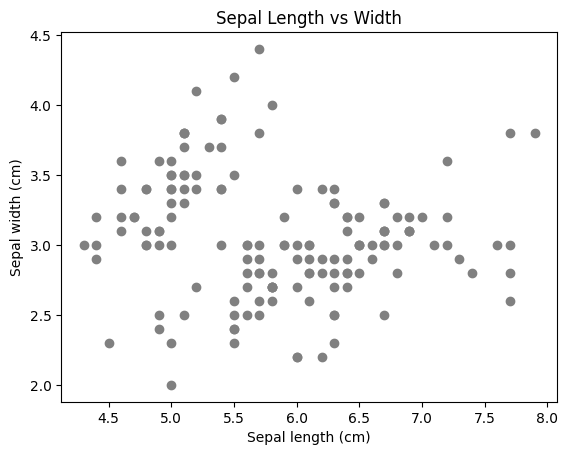

In [23]:
# Plot data
plt.scatter(data_sepal[:, 0], data_sepal[:, 1], c='gray')
plt.title('Sepal Length vs Width')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')

plt.show()

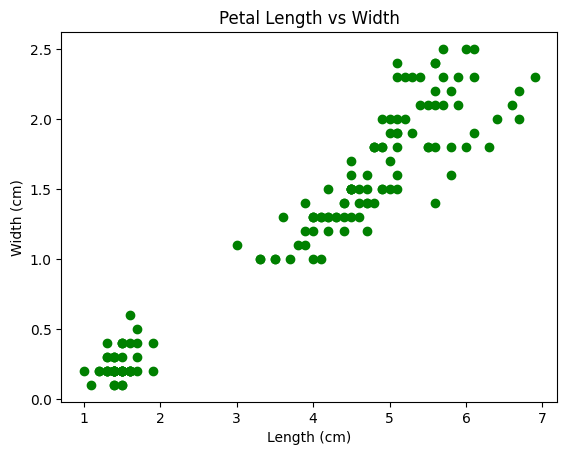

In [24]:
# Plot data for Petal

plt.scatter(data[:, 2], data[:, 3], c='g')
plt.title('Petal Length vs Width')
plt.xlabel('Length (cm)')
plt.ylabel('Width (cm)')
plt.show()

In [25]:
class KMeans:
    def __init__(self, k=3, max_iters=100):
        self.k = k                  # Number of clusters
        self.max_iters = max_iters  # Number of max iterations
        self.centroids = None       # Center coordinates of teh centroid
        self.clusters = None        # Cluster of each data point

    def initialize_centroids(self, data):
        '''
        Initialize centroids
        Params:
            data (np.ndarray): input data to be clustered
        Returns:
            None
        '''
        np.random.seed(42)
        self.centroids = data[np.random.choice(data.shape[0], self.k, replace=False)]

    def euclidean_distance(self, x1, x2):
        '''
        Compute the euclidean distance between 2 points x1 and x2
        Params:
            x1 (np.ndarray): data point 1
            x2 (np.ndarray): data point 2
        Returns:
            float: Euclidean distance
        '''
        return np.sqrt(np.sum(np.power(x1 - x2, 2)))

    def assign_clusters(self, data):
        '''
        Cluster data
        Params:
            data (np.ndarray): input data to be clustered
        Returns:
        np.ndarray: an array containing each data point
        '''
        distances = np.array(
            [[self.euclidean_distance(x, centroid) for centroid in self.centroids] for x in data]
        )

        return np.argmin(distances, axis=1)

    def update_centroids(self, data):
        '''
        Update centroids
        Params:
            data (np.ndarray): input data to be clustered
        
        Returns:
            np.ndarray: array containing new centroids
        '''
        return np.array(
            [data[self.clusters == i].mean(axis=0) for i in range(self.k)]
        )

    def fit(self, data):
        '''
        Train function
        Params:
            data (np.ndarray): input data to be clustered

        Returns:
            None
        '''

        # Call initialize function to create centroids
        self.initialize_centroids(data)
        self.plot_clusters(data, 0)

        for i in range(self.max_iters):
            # Assign cluster to nearest data points
            self.clusters = self.assign_clusters(data)

            # Visualize clusters and their centroids at this i-th iteration
            self.plot_clusters(data, i)

            # Based on the data points of each cluster, move the centroids to the center (by calculating mean) of the cluster
            new_centroids = self.update_centroids(data)

            # If the centroids don't move, stop the loop
            if np.all(self.centroids == new_centroids):
                break
            
            # If the centroids move, iterate a new loop with new centroids
            self.centroids = new_centroids
            self.plot_clusters(data, i)

        # Plot final results of clusters and centroids
        self.plot_final_clusters(data)


    def plot_clusters(self, data, iteration):
        '''
        Plot clusters and their centroids at each iteration
        Params:
            data (np.ndarray): input data to be clustered
            iteration (int): current iteration

        Returns:
            None
        '''
        plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)

        plt.scatter(self.centroids[:, 0], self.centroids[:, 1],
                    s=400, c='red', marker='x')

        plt.title(f"Iteration {iteration + 1}")
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.show()

    def plot_final_clusters(self, data):
        '''
        Plot final clusters and centroids
        Params:
            data (np.ndarray): input data to be clustered

        Returns:
            None
        '''
        plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis',
                    marker='o', alpha=0.6)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], s=300,
                    c='red', marker='x')

        plt.title('Final Clusters and Centroids')
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.show()

        

C:\Users\Mini Pc\AppData\Local\Temp\ipykernel_21668\946269112.py:103: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)


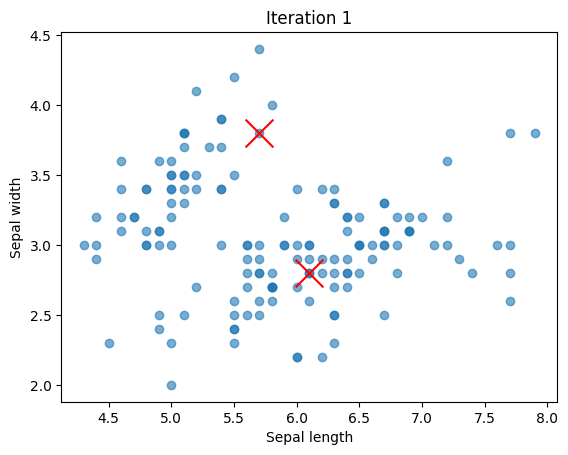

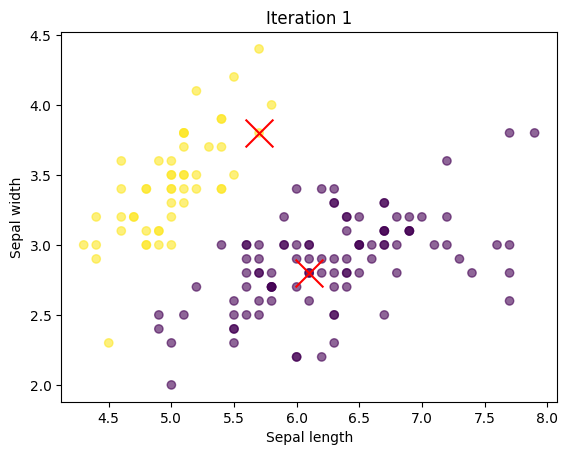

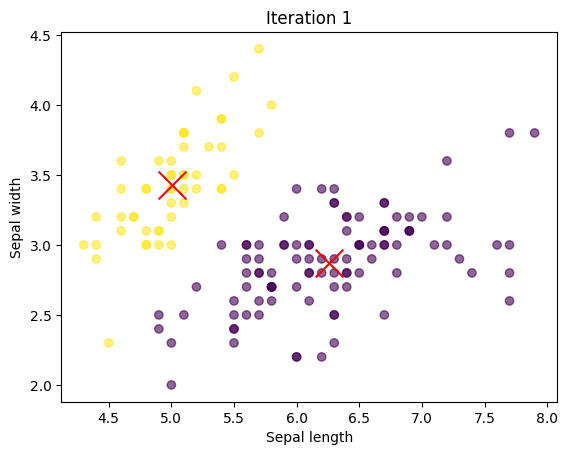

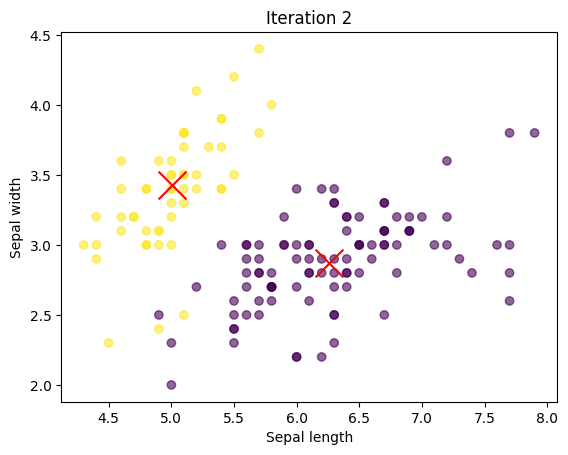

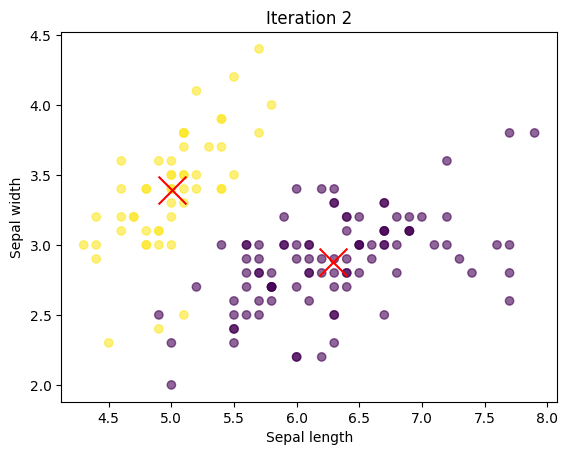

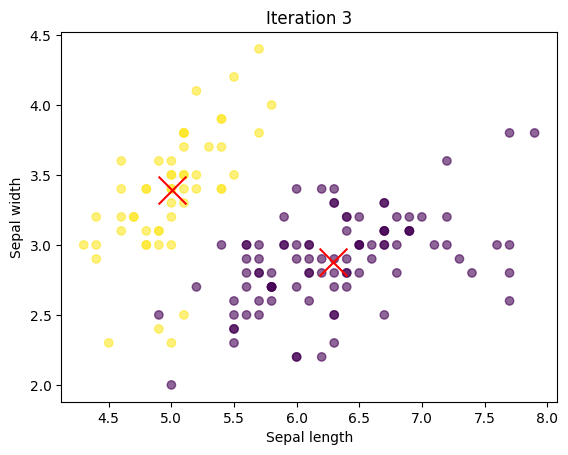

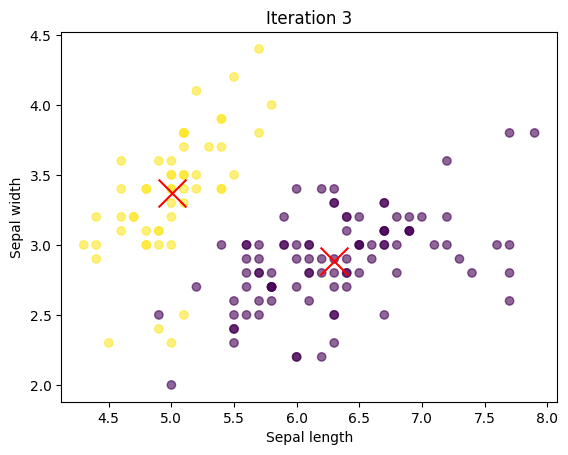

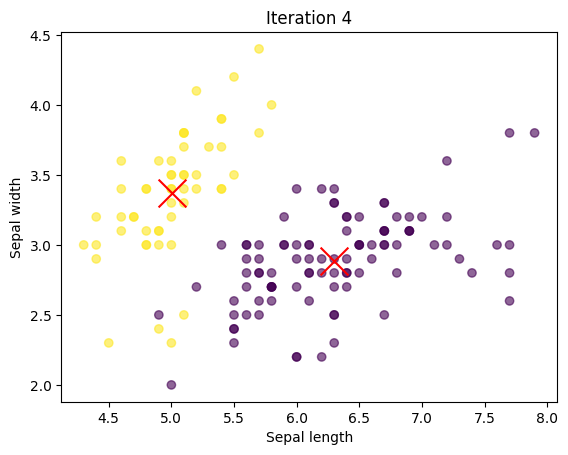

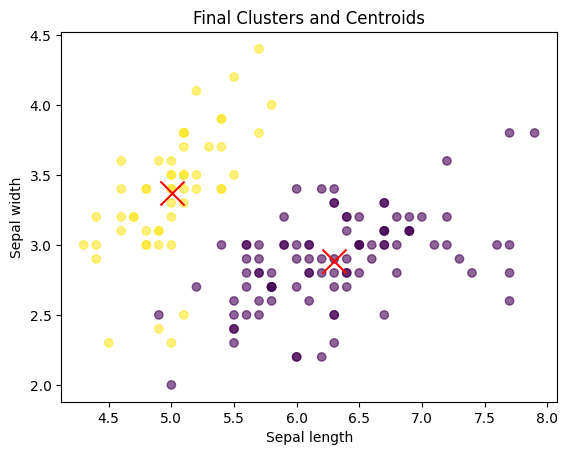

In [26]:
kmeans = KMeans(k=2)
kmeans.fit(data)
# plt.show()



C:\Users\Mini Pc\AppData\Local\Temp\ipykernel_21668\946269112.py:103: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)


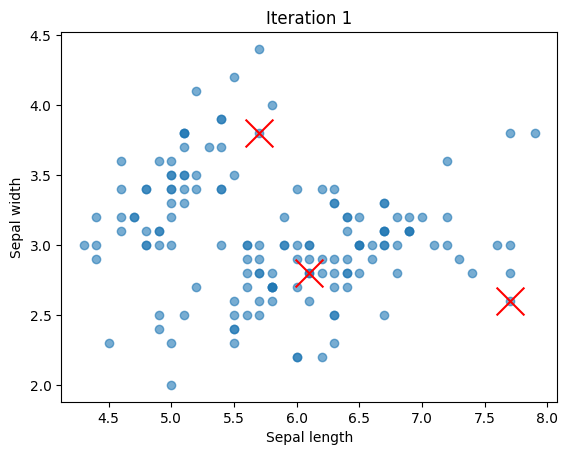

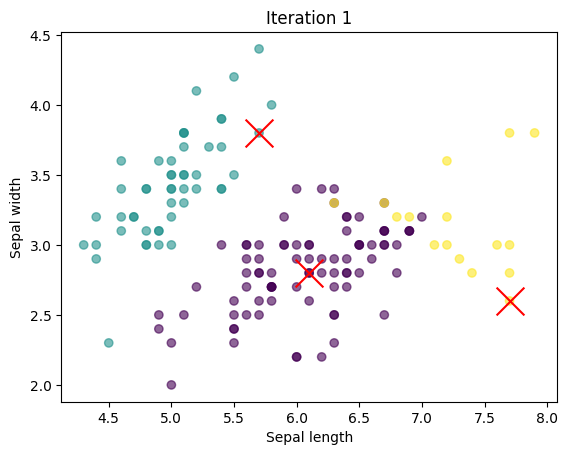

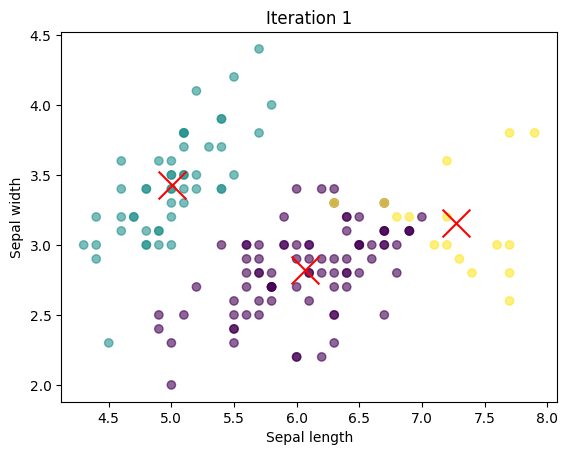

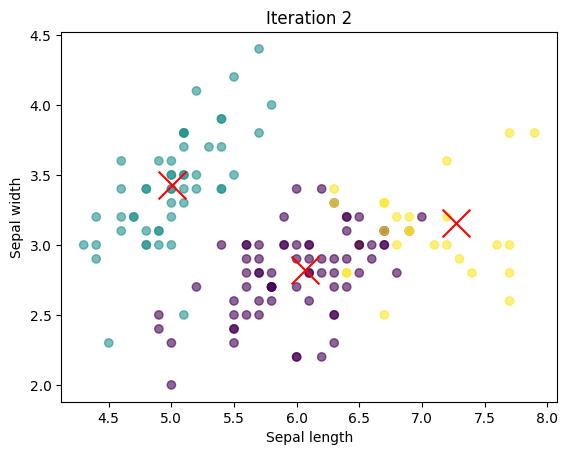

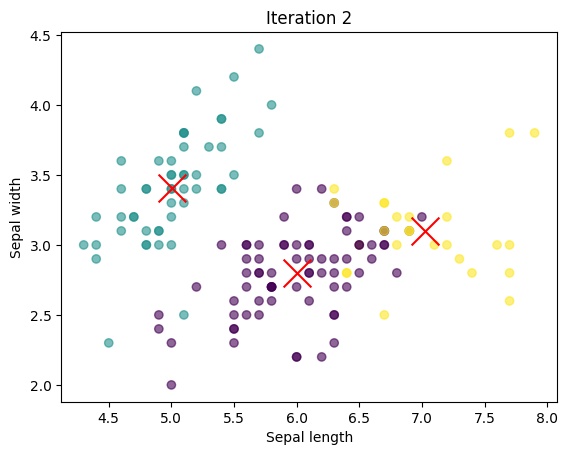

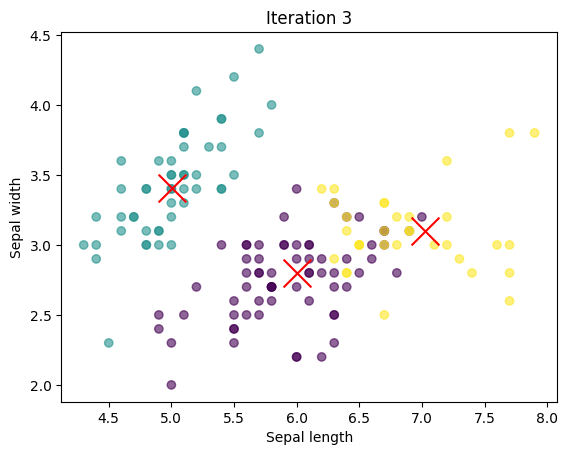

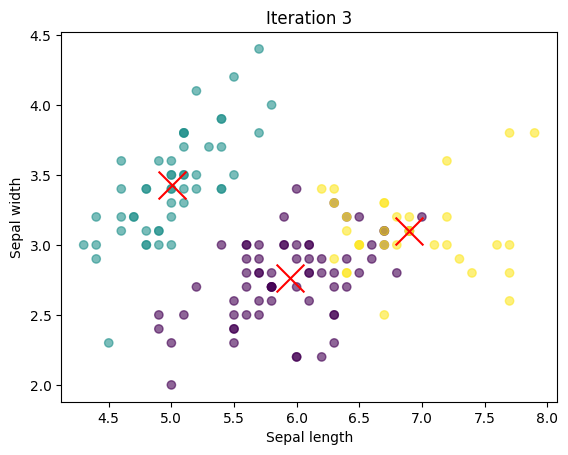

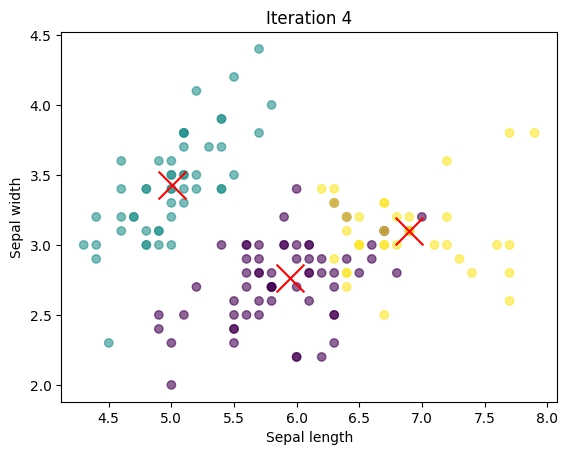

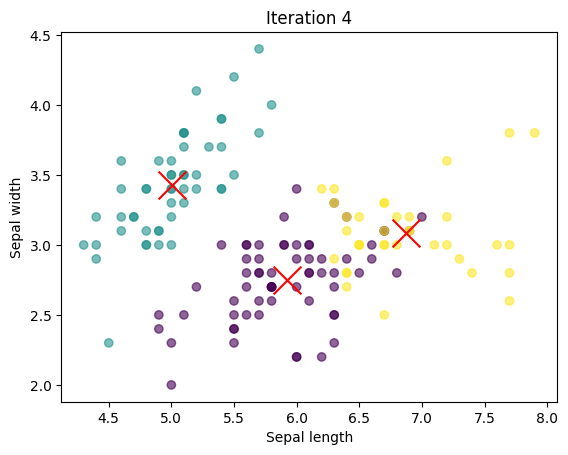

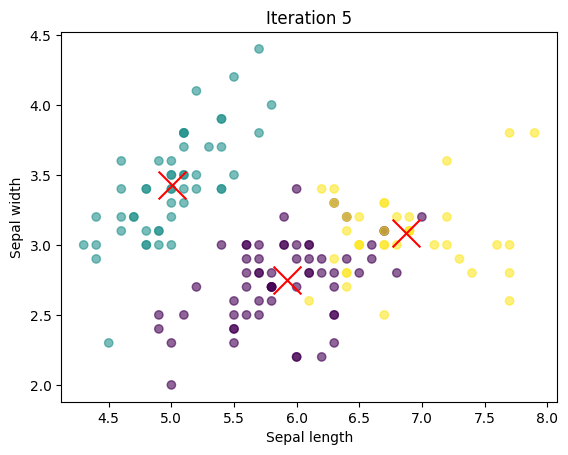

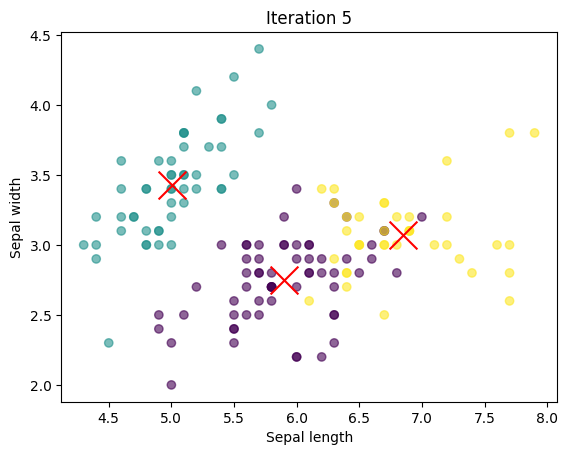

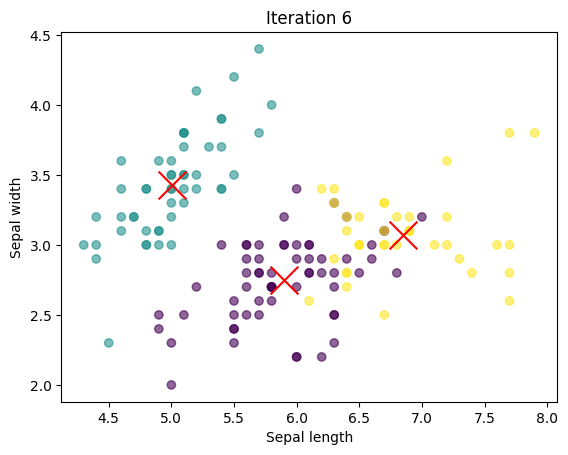

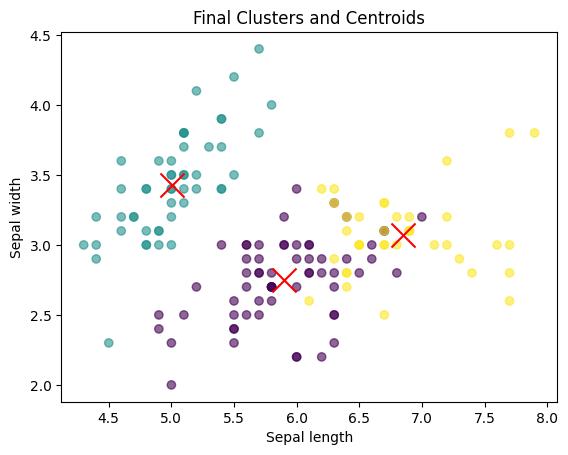

In [27]:
kmeans = KMeans(k=3)
kmeans.fit(data)

C:\Users\Mini Pc\AppData\Local\Temp\ipykernel_21668\946269112.py:103: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)


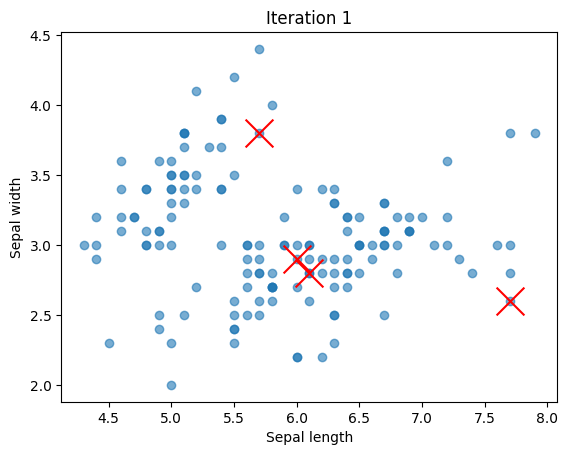

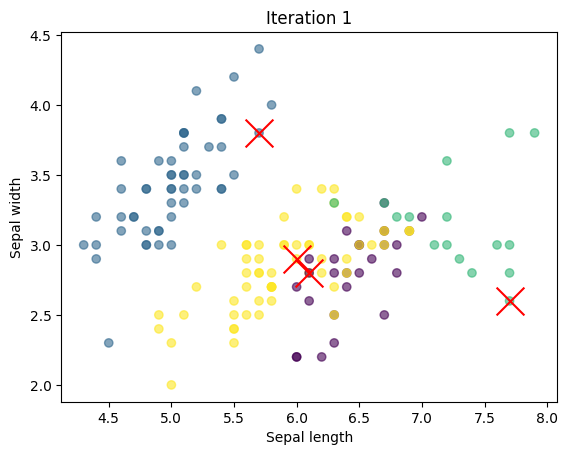

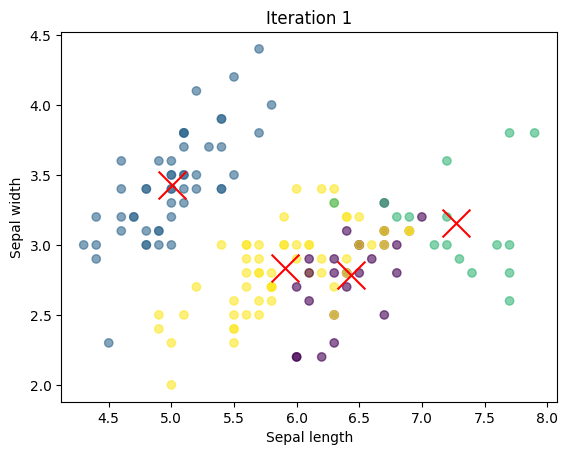

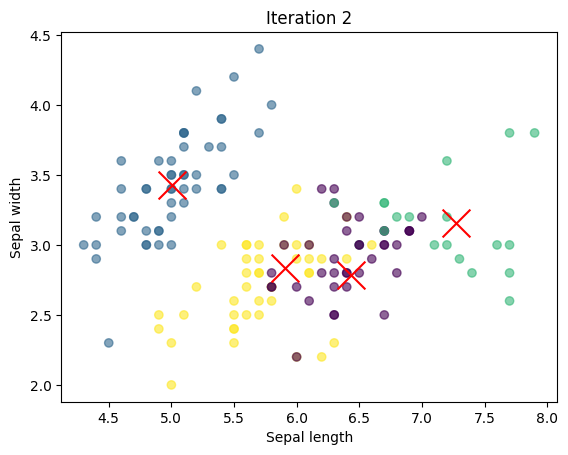

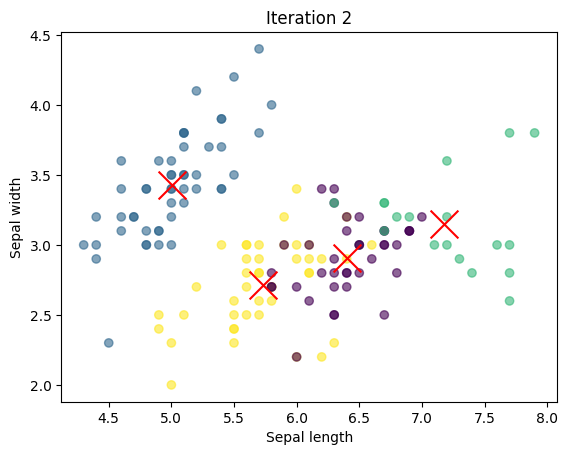

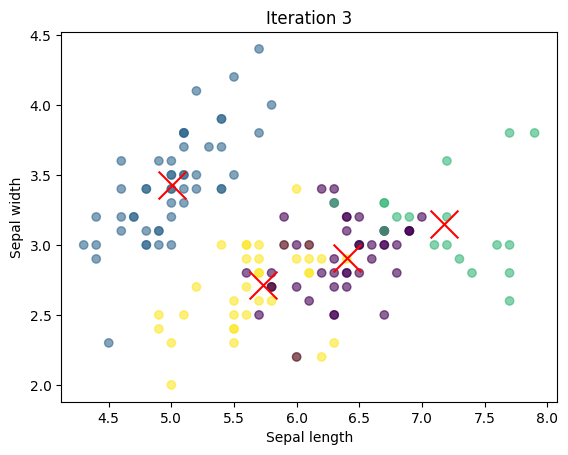

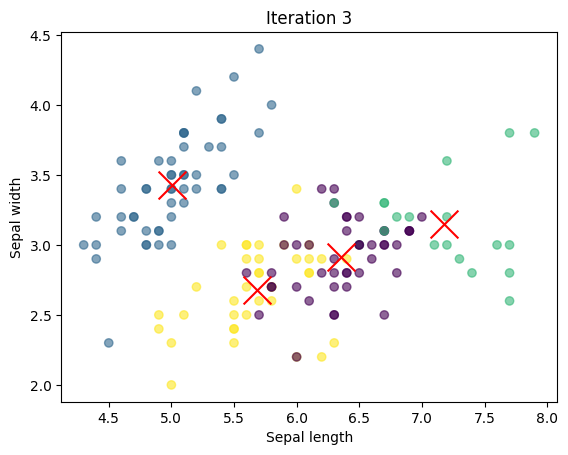

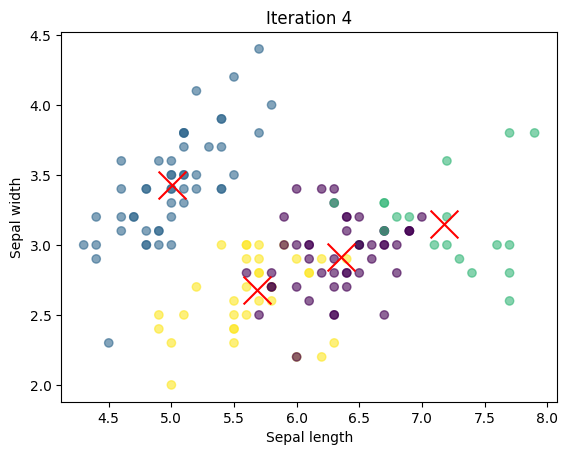

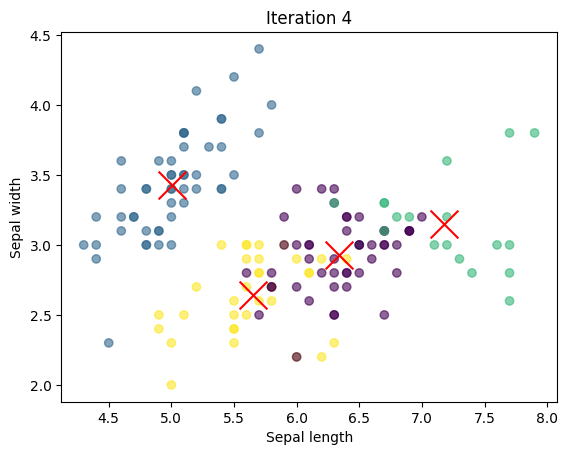

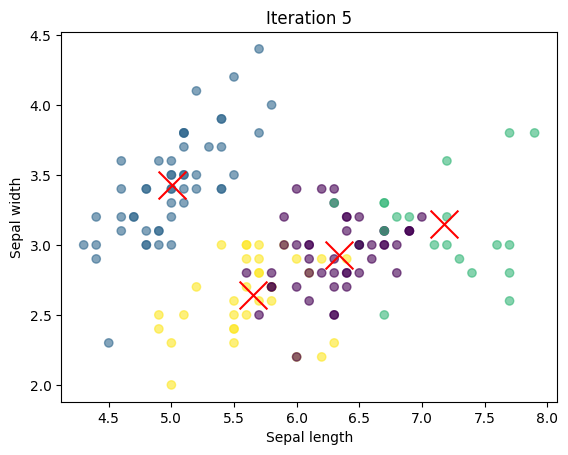

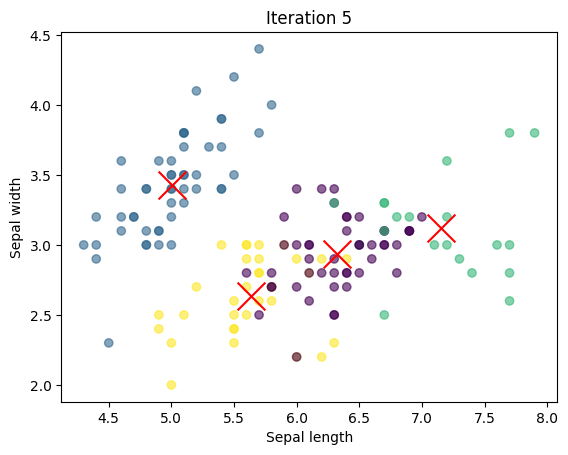

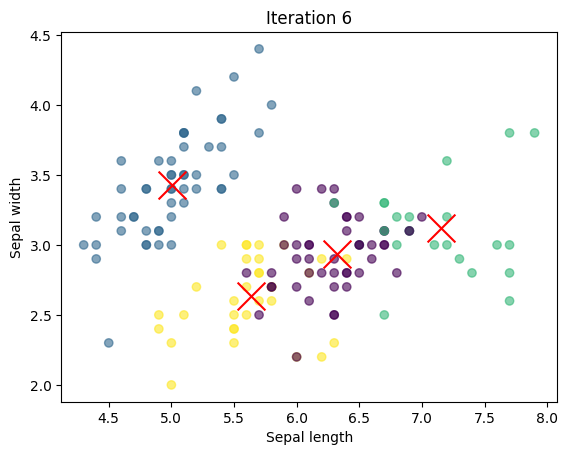

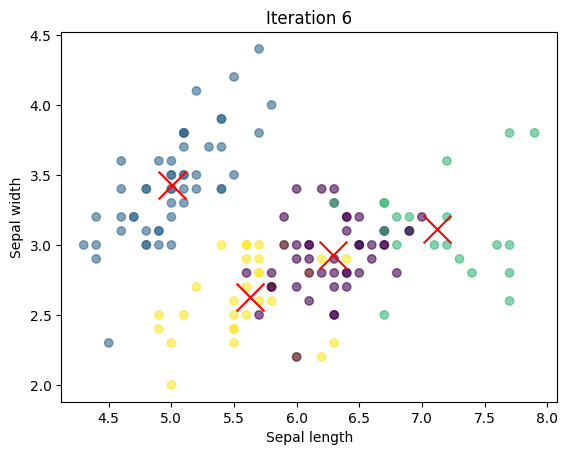

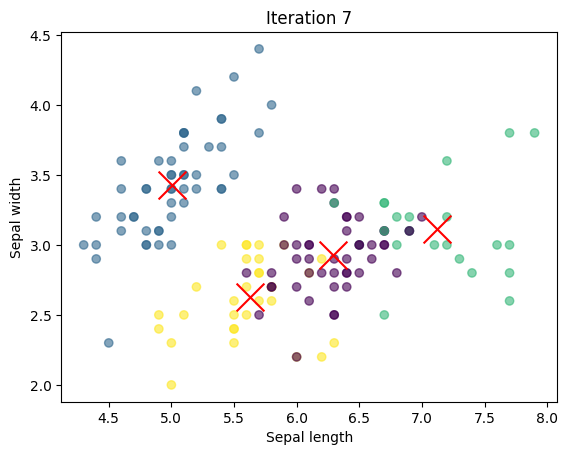

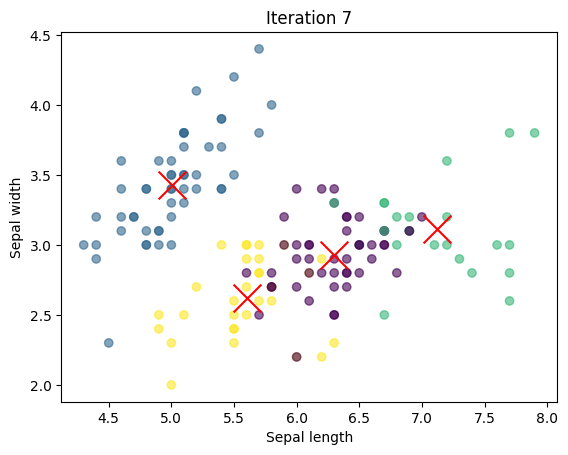

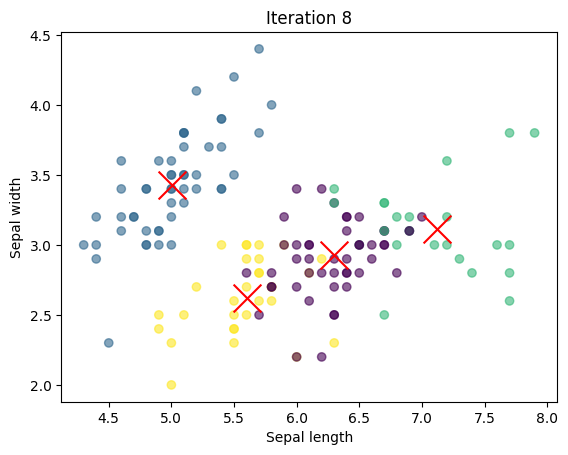

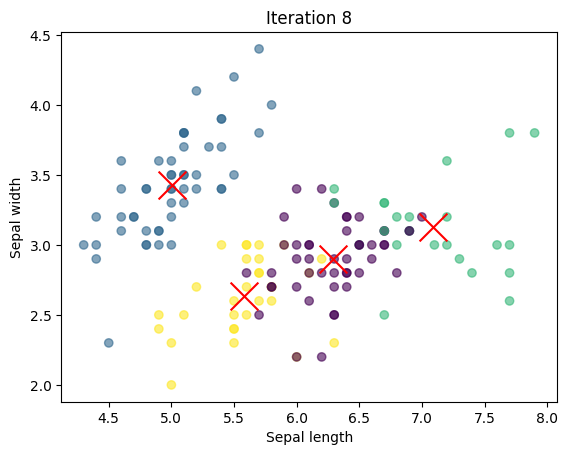

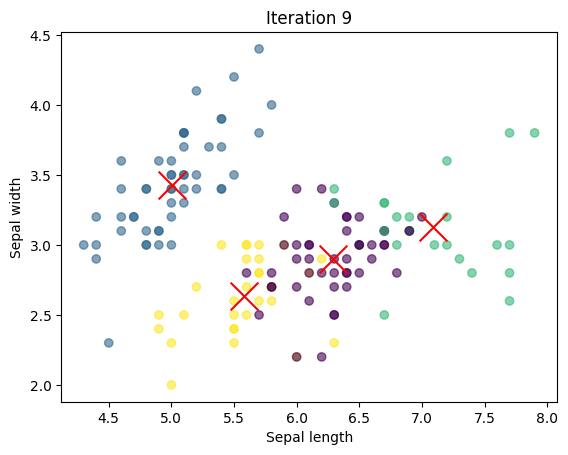

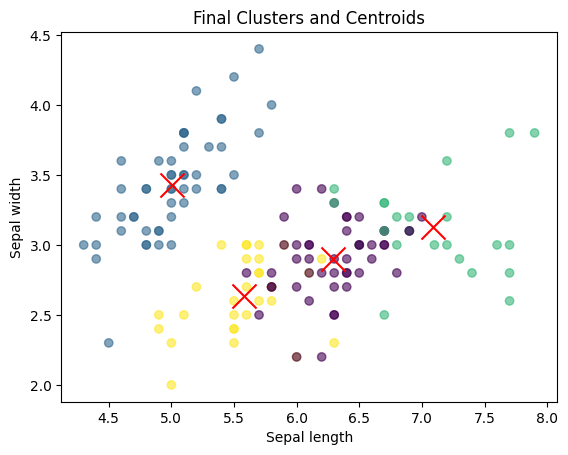

In [28]:
kmeans = KMeans(k=4)
kmeans.fit(data)

In [29]:
x1 = np.array([2, 3, 1.5])
x2 = np.array([8, 8, 7.5])

print(np.sqrt( ((x1 - x2)**2).sum(axis=0)))

9.848857801796104


In [30]:
data_test = np.array([
    [2.0, 3.0, 1.5],
    [3.0, 3.5, 2.0],
    [3.5, 3.0, 2.5],
    [8.0, 8.0, 7.5],
    [8.5, 8.5, 8.0],
    [9.0, 8.0, 8.5],
    [1.0, 2.0, 1.0],
    [1.5, 2.5, 1.5]
])

C:\Users\Mini Pc\AppData\Local\Temp\ipykernel_21668\946269112.py:103: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)


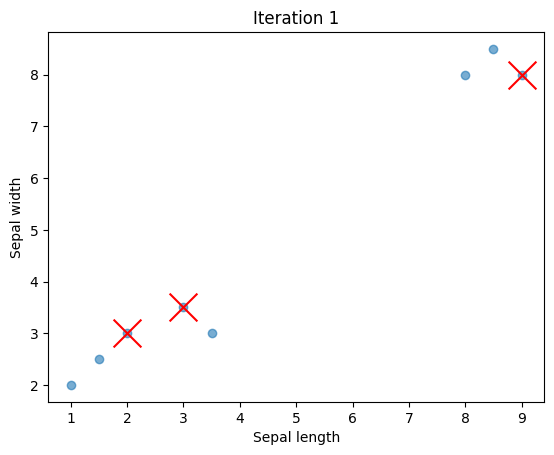

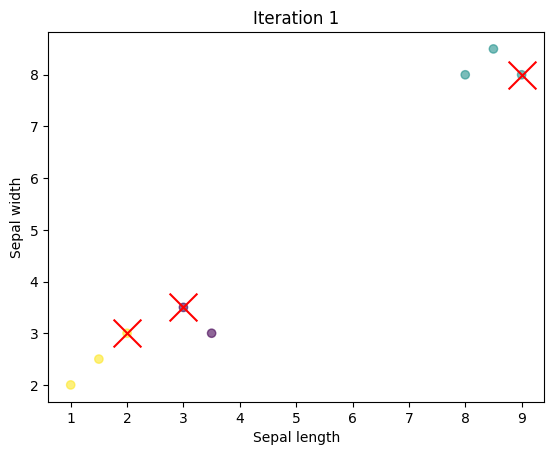

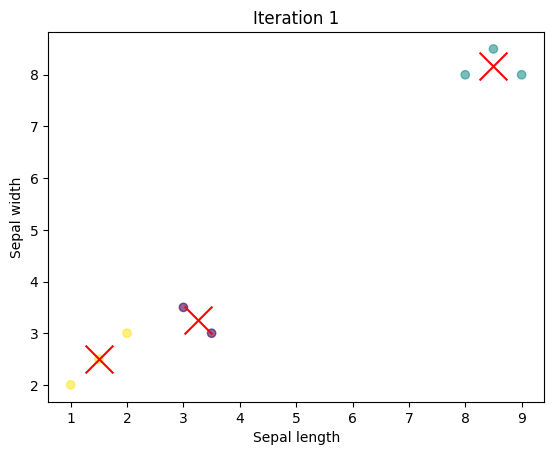

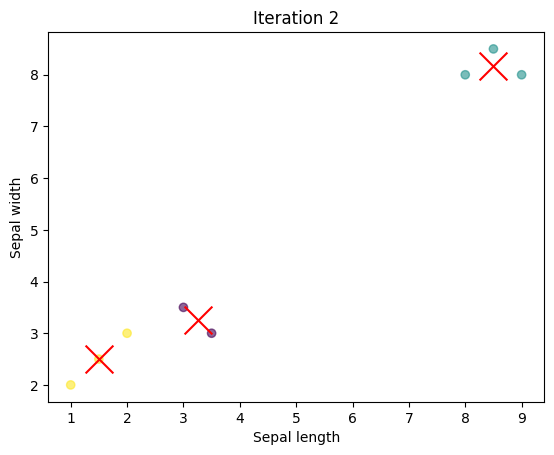

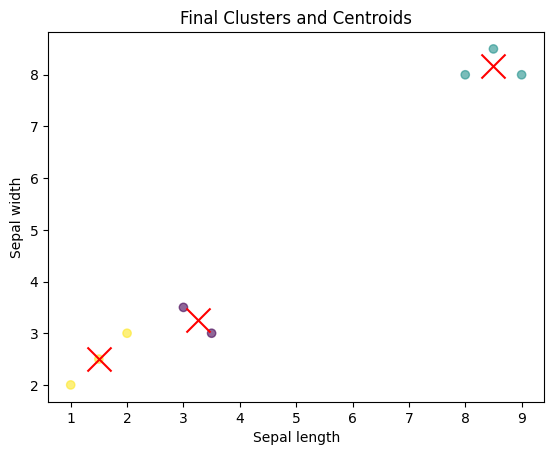

In [31]:
kmeans_test = KMeans(k=3)
kmeans_test.fit(data_test)

### Question 9:

In [32]:
def euclidean_distance(x1, x2):
    return np.sqrt( ((x1 - x2)**2).sum(axis=0) )

In [33]:
x1 = np.array([2, 3, 1.5])
x2 = np.array([8, 8, 7.5])
print(euclidean_distance(x1, x2))


9.848857801796104
